# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# EDA

In [4]:
df = pd.read_csv(r"C:\Users\habib\OneDrive\Desktop\IEEE\AI_CS_IEEE-ZSB-26\Preprocessing_project\weatherAUS.csv")

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
print(f" The data frame shape : {df.shape}")

 The data frame shape : (145460, 23)


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
# Converting the data column to a date type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [10]:
# Separating the date into theree Columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [11]:
# dropping the date column
df.drop("Date",axis=1,inplace=True)

## Handling Missing Values

In [12]:
# Missing value check
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
RainToday         2.241853
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64

In [13]:
# Splitting the numerical and catigorical columns
num_cols  = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("object").columns

In [14]:
# Using iterative imputer for numerical columns
iter_imputer = IterativeImputer(max_iter=20 , random_state=42)
df[num_cols] = iter_imputer.fit_transform(df[num_cols])

c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [15]:
# Using simple imputer for catigorical columns
sim_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = sim_imputer.fit_transform(df[cat_cols])

In [16]:
# check the missing values
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

## Handiling the outliers

In [17]:
# Checking for the outliers
def outlier_report(df):
        for col in num_cols:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR=Q3-Q1
                lower_bound = Q1-1.5*IQR
                upper_bound = Q3+1.5*IQR
                
                outlier_count = ((df[col]<lower_bound)|(df[col]>upper_bound)).sum()
                outlier_per = (outlier_count/len(df))*100
                print(f"{col} : {outlier_per.__round__(3)}")
                
outlier_report(df)

MinTemp : 0.044
MaxTemp : 0.377
Rainfall : 19.15
Evaporation : 2.358
Sunshine : 0.006
WindGustSpeed : 2.172
WindSpeed9am : 1.252
WindSpeed3pm : 1.741
Humidity9am : 0.984
Humidity3pm : 0.003
Pressure9am : 1.337
Pressure3pm : 1.098
Cloud9am : 0.0
Cloud3pm : 0.001
Temp9am : 0.235
Temp3pm : 0.601
Year : 0.0
Month : 0.0
Day : 0.0


Text(0.5, 1.05, 'Outlier Detection using Boxplots')

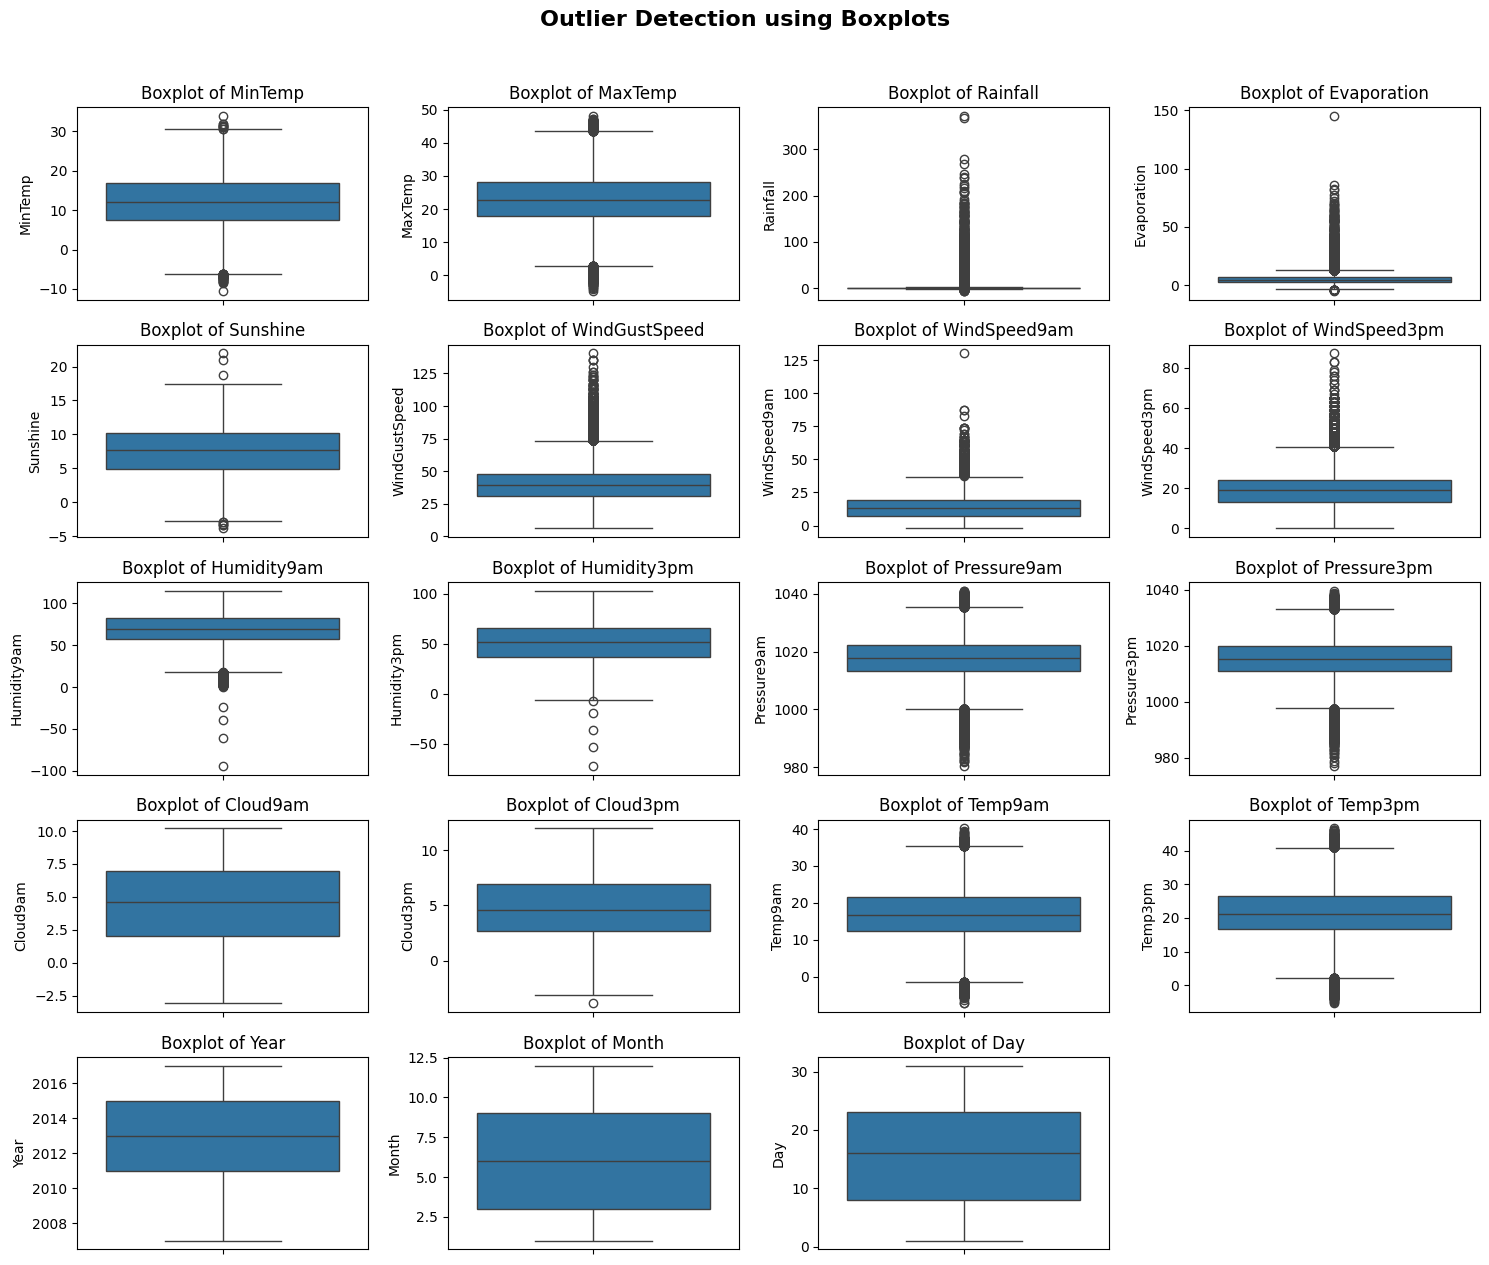

In [18]:
# Outliers visualization

plt.figure(figsize=(15, 12))

for i, feature in enumerate(num_cols, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()

plt.suptitle("Outlier Detection using Boxplots", fontsize=16,fontweight="bold",y=1.05)

In [19]:
# Capping outliers
for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        

In [20]:
outlier_report(df)

MinTemp : 0.0
MaxTemp : 0.0
Rainfall : 0.0
Evaporation : 0.0
Sunshine : 0.0
WindGustSpeed : 0.0
WindSpeed9am : 0.0
WindSpeed3pm : 0.0
Humidity9am : 0.0
Humidity3pm : 0.0
Pressure9am : 0.0
Pressure3pm : 0.0
Cloud9am : 0.0
Cloud3pm : 0.0
Temp9am : 0.0
Temp3pm : 0.0
Year : 0.0
Month : 0.0
Day : 0.0


## Handling Skewness 

In [21]:
# Checking the skewness
def skewness (col):
    return df[col].skew().round(2)

for col in num_cols:
    print (f"{col} : {skewness(col)}")

MinTemp : 0.02
MaxTemp : 0.24
Rainfall : 1.14
Evaporation : 0.57
Sunshine : -0.29
WindGustSpeed : 0.57
WindSpeed9am : 0.51
WindSpeed3pm : 0.4
Humidity9am : -0.43
Humidity3pm : 0.02
Pressure9am : -0.04
Pressure3pm : -0.01
Cloud9am : -0.18
Cloud3pm : -0.14
Temp9am : 0.08
Temp3pm : 0.24
Year : -0.05
Month : 0.03
Day : 0.01


Text(0.5, 1.05, 'Distibution of values')

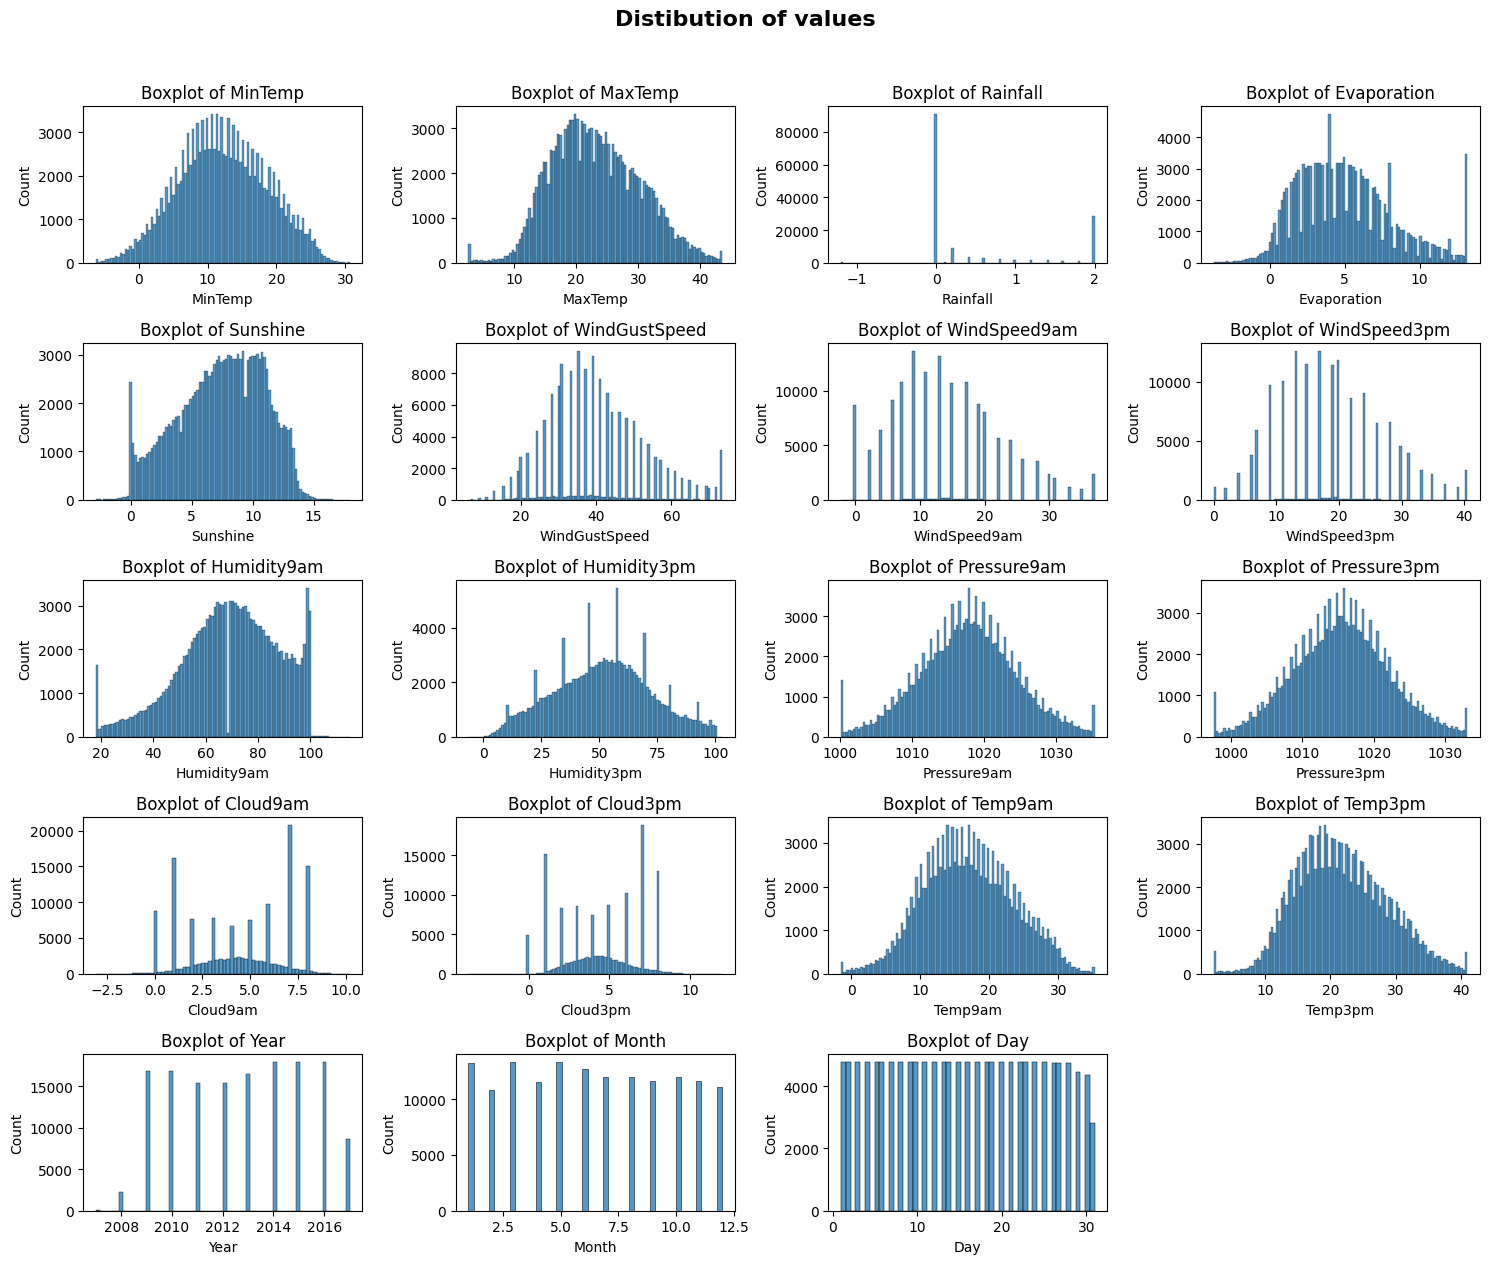

In [22]:
# skewness visulization
plt.figure(figsize=(15, 12))

for i, feature in enumerate(num_cols, start=1):
    plt.subplot(5, 4, i)
    sns.histplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()

plt.suptitle("Distibution of values", fontsize=16,fontweight="bold",y=1.05)

In [23]:
# Handling skewness using log transformation
for col in num_cols:
    if (np.abs(skewness(col)))>1:
        df[col] = np.log(1+np.abs(df[col]))
for col in num_cols:
    print (f"{col} : {skewness(col)}")

MinTemp : 0.02
MaxTemp : 0.24
Rainfall : 1.04
Evaporation : 0.57
Sunshine : -0.29
WindGustSpeed : 0.57
WindSpeed9am : 0.51
WindSpeed3pm : 0.4
Humidity9am : -0.43
Humidity3pm : 0.02
Pressure9am : -0.04
Pressure3pm : -0.01
Cloud9am : -0.18
Cloud3pm : -0.14
Temp9am : 0.08
Temp3pm : 0.24
Year : -0.05
Month : 0.03
Day : 0.01


## Data splitting


In [24]:
#Data splitting

x = df.drop('RainTomorrow',axis=1)
y= df['RainTomorrow']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)

## Encoding

In [25]:
for col in cat_cols:
    print(f"{col} : {df[col].nunique()}")

Location : 49
WindGustDir : 16
WindDir9am : 16
WindDir3pm : 16
RainToday : 2
RainTomorrow : 2


Most of the columns have large number of values so one hot encoding won't be the best choise

In [26]:
# Using frequancy encoding for location column
location_freq = df['Location'].value_counts()/len(df)
df['location'] = df['Location'].map(location_freq)
df.drop('Location',axis=1,inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,location
0,13.4,22.900000,0.470004,6.279843,7.295334,W,44.000000,W,WNW,20.0,...,8.000000,5.085537,16.9,21.8,No,No,2008.0,12.0,1.0,0.020899
1,7.4,25.100000,0.000000,6.262698,11.192344,WNW,44.000000,NNW,WSW,4.0,...,1.863860,2.553981,17.2,24.3,No,No,2008.0,12.0,2.0,0.020899
2,12.9,25.700000,0.000000,8.573448,12.059899,WSW,46.000000,W,WSW,19.0,...,2.022799,2.000000,21.0,23.2,No,No,2008.0,12.0,3.0,0.020899
3,9.2,28.000000,0.000000,6.806930,11.915752,NE,24.000000,SE,E,11.0,...,1.129103,1.876700,18.1,26.5,No,No,2008.0,12.0,4.0,0.020899
4,17.5,32.300000,0.693147,7.508601,5.980353,W,41.000000,ENE,NW,7.0,...,7.000000,8.000000,17.8,29.7,No,No,2008.0,12.0,5.0,0.020899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.000000,5.596218,10.321009,E,31.000000,SE,ENE,13.0,...,1.701603,2.391644,10.1,22.4,No,No,2017.0,6.0,21.0,0.010848
145456,3.6,25.300000,0.000000,5.670799,11.099294,NNW,22.000000,SE,N,13.0,...,1.540507,1.975921,10.9,24.5,No,No,2017.0,6.0,22.0,0.010848
145457,5.4,26.900000,0.000000,6.566312,10.321292,N,37.000000,SE,WNW,9.0,...,1.995960,2.599420,12.5,26.1,No,No,2017.0,6.0,23.0,0.010848
145458,7.8,27.000000,0.000000,7.023266,10.544048,SE,28.000000,SSE,N,13.0,...,3.000000,2.000000,15.1,26.0,No,No,2017.0,6.0,24.0,0.010848


In [27]:
# label encoding for the rest of catigorical columns
cat_cols = x_train.select_dtypes('object').columns
for col in cat_cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
 
df   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,location
0,13.4,22.900000,0.470004,6.279843,7.295334,W,44.000000,W,WNW,20.0,...,8.000000,5.085537,16.9,21.8,No,No,2008.0,12.0,1.0,0.020899
1,7.4,25.100000,0.000000,6.262698,11.192344,WNW,44.000000,NNW,WSW,4.0,...,1.863860,2.553981,17.2,24.3,No,No,2008.0,12.0,2.0,0.020899
2,12.9,25.700000,0.000000,8.573448,12.059899,WSW,46.000000,W,WSW,19.0,...,2.022799,2.000000,21.0,23.2,No,No,2008.0,12.0,3.0,0.020899
3,9.2,28.000000,0.000000,6.806930,11.915752,NE,24.000000,SE,E,11.0,...,1.129103,1.876700,18.1,26.5,No,No,2008.0,12.0,4.0,0.020899
4,17.5,32.300000,0.693147,7.508601,5.980353,W,41.000000,ENE,NW,7.0,...,7.000000,8.000000,17.8,29.7,No,No,2008.0,12.0,5.0,0.020899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.000000,5.596218,10.321009,E,31.000000,SE,ENE,13.0,...,1.701603,2.391644,10.1,22.4,No,No,2017.0,6.0,21.0,0.010848
145456,3.6,25.300000,0.000000,5.670799,11.099294,NNW,22.000000,SE,N,13.0,...,1.540507,1.975921,10.9,24.5,No,No,2017.0,6.0,22.0,0.010848
145457,5.4,26.900000,0.000000,6.566312,10.321292,N,37.000000,SE,WNW,9.0,...,1.995960,2.599420,12.5,26.1,No,No,2017.0,6.0,23.0,0.010848
145458,7.8,27.000000,0.000000,7.023266,10.544048,SE,28.000000,SSE,N,13.0,...,3.000000,2.000000,15.1,26.0,No,No,2017.0,6.0,24.0,0.010848


## Scaling

In [28]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,location
0,13.4,22.9,0.470004,6.279843,7.295334,W,44.0,W,WNW,20.0,...,8.000000,5.085537,16.9,21.8,No,No,2008.0,12.0,1.0,0.020899
1,7.4,25.1,0.000000,6.262698,11.192344,WNW,44.0,NNW,WSW,4.0,...,1.863860,2.553981,17.2,24.3,No,No,2008.0,12.0,2.0,0.020899
2,12.9,25.7,0.000000,8.573448,12.059899,WSW,46.0,W,WSW,19.0,...,2.022799,2.000000,21.0,23.2,No,No,2008.0,12.0,3.0,0.020899
3,9.2,28.0,0.000000,6.806930,11.915752,NE,24.0,SE,E,11.0,...,1.129103,1.876700,18.1,26.5,No,No,2008.0,12.0,4.0,0.020899
4,17.5,32.3,0.693147,7.508601,5.980353,W,41.0,ENE,NW,7.0,...,7.000000,8.000000,17.8,29.7,No,No,2008.0,12.0,5.0,0.020899


## Handling Imblance

<Axes: xlabel='RainTomorrow', ylabel='count'>

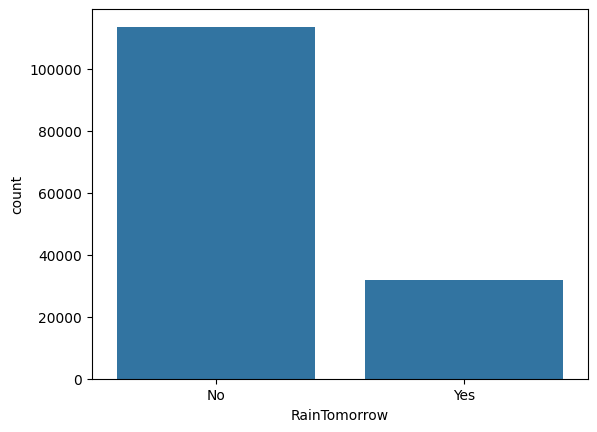

In [29]:
# Class imbalance visualization
sns.countplot(x=df['RainTomorrow'])

In [30]:
# Handling imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_s, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: RainTomorrow
No     90911
Yes    25457
Name: count, dtype: int64
After SMOTE: RainTomorrow
Yes    90911
No     90911
Name: count, dtype: int64


## Modeling

In [31]:
# try random forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
# fitting
rf_model.fit(x_train_res, y_train_res)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# prediction
y_pred = rf_model.predict(x_test_s)
y_prob = rf_model.predict_proba(x_test_s)[:,1]  # prob of Yes

Accuracy: 0.8475525917778083


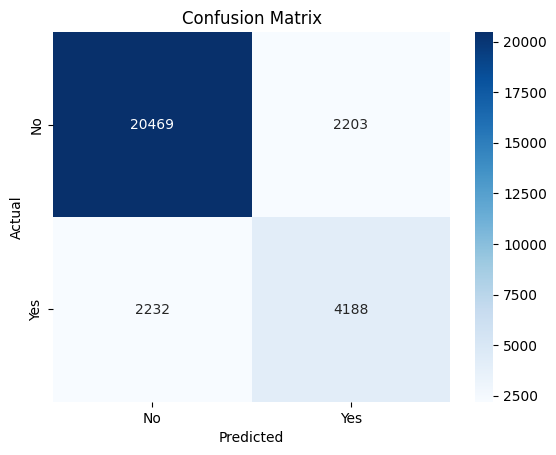

              precision    recall  f1-score   support

          No       0.90      0.90      0.90     22672
         Yes       0.66      0.65      0.65      6420

    accuracy                           0.85     29092
   macro avg       0.78      0.78      0.78     29092
weighted avg       0.85      0.85      0.85     29092

ROC-AUC: 0.8871600579962494


In [33]:
# Evaluation
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc)